In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

from sklearn.feature_extraction.text import CountVectorizer

import gc

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

import nltk

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
def dateYear(date):
    return 

def dateConverter(date):
    
    monthUKFR = dict()
    monthUKFR['janvier'] = 1
    monthUKFR['février'] = 2
    monthUKFR['mars'] = 3
    monthUKFR['avril'] = 4
    monthUKFR['mai'] = 5
    monthUKFR['juin'] = 6
    monthUKFR['juillet'] = 7
    monthUKFR['août'] = 8
    monthUKFR['septembre'] = 9
    monthUKFR['octobre'] = 10
    monthUKFR['novembre'] = 11
    monthUKFR['décembre'] = 12
    
    day = int(re.findall(r'\S+', date)[0])
    month = monthUKFR[re.findall(r'\S+', date)[1]]
    year = int(re.findall(r'\S+', date)[2])
    
    return datetime(year,month,day)



reviews=pd.read_csv('reviews.csv', encoding = 'utf-8')
reviews['reviewYear'] = reviews.reviewDate.apply(lambda x: dateConverter(x))
#reviews_fr = reviews[reviews['language'] == 'fr']
reviews_en = reviews[reviews['language'] == 'en']





In [3]:
class barometre:
    
    def __init__(self, reviews):
        self.reviews = reviews
        self.categories = dict()
    
    def addCategory(self, name, words):
        #ajoute une nouvelle catégorie au baromètre. Les catégories sont définies par un groupe de mots.
        self.categories[name] = words
    
    def vectorizeReviews(self):
        self.vect = CountVectorizer(lowercase=True, preprocessor=None, token_pattern=r'\b\w+\b', ngram_range=(1, 2), max_df=.8, min_df=1)
        self.vectM = self.vect.fit_transform(self.reviews.reviewDescription)
        
    def tagCat(self,catName):
        for w in self.categories[catName]:
            vocab = self.vect.vocabulary_.get(w) #la colonne du mot de la catégorie
            slice = self.vectM[:,vocab].toarray() #l'ensemble des reviews contenant ce mot
            if catName in baro.reviews.columns:
                baro.reviews[catName] =(baro.reviews[catName].values | (slice > 0)) #création d'une colonne du nom de la catégorie
            else:
                baro.reviews[catName] = (slice > 0) #création d'une colonne du nom de la catégorie
            
    def plotCat(self):
        d = self.reviews.loc[:,self.categories.keys()] #reviews filtrées sur les catégories
        d = d[d.sum(axis=1) > 0] #reviews qui ont été taggés au moins une fois
        df = pd.concat([d, self.reviews.reviewYear.apply(lambda x: (x.year, x.month))], axis=1, join_axes=[d.index] ) #ajout de l'année
        valeurs = (df.groupby('reviewYear').sum()/
                   self.reviews.groupby(self.reviews.reviewYear.apply(lambda x: (x.year, x.month))).count()).loc[:,self.categories.keys()] #décompte du nombre par an
        
        valeurs = valeurs.dropna()
        
        x = valeurs.index.values
        
        print(valeurs)
      
        
        y1 = valeurs.iloc[:,0]
        y2 = valeurs.iloc[:,1]
        y3 = valeurs.iloc[:,2]
       
        
        xd = [datetime(t[0],t[1],1) for t in x]
    
        plt.style.use('ggplot')
        
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.stackplot(xd, y1*100, y2*100, y3*100)

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

        fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels)
        
        
    def printWord(self, word):
        vocab = self.vect.vocabulary_.get(word) #la colonne du mot de la catégorie
        slice = self.vectM[:,vocab].toarray() #l'ensemble des reviews contenant ce mot
        print(self.reviews[slice > 1]['reviewDescription'])

    def info(self):
        return self.reviews.groupby(list(self.categories.keys())).reviewDescription.count()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             culture  workplace       pay
reviewYear                               
(2011, 11)  0.000000   0.500000  0.000000
(2011, 12)  0.000000   0.111111  0.000000
(2012, 1)   0.000000   0.142857  0.000000
(2012, 2)   0.000000   0.173913  0.000000
(2012, 3)   0.000000   0.068966  0.022989
(2012, 4)   0.000000   0.120000  0.000000
(2012, 5)   0.000000   0.142857  0.019048
(2012, 6)   0.000000   0.142857  0.023810
(2012, 7)   0.000000   0.092437  0.008403
(2012, 8)   0.000000   0.108333  0.008333
(2012, 9)   0.000000   0.126050  0.008403
(2012, 10)  0.000000   0.096296  0.007407
(2012, 11)  0.000000   0.126437  0.022989
(2012, 12)  0.012987   0.155844  0.038961
(2013, 1)   0.000000   0.154362  0.006711
(2013, 2)   0.000000   0.130081  0.000000
(2013, 3)   0.000000   0.088435  0.006803
(2013, 4)   0.000000   0.163399  0.026144
(2013, 5)   0.000000   0.163265  0.013605
(2013, 6)   0.006173   0.111111  0.000000
(2013, 7)   0.000000   0.086735  0.010204
(2013, 8)   0.000000   0.105882  0

culture  workplace  pay  
False    False      False    11088
                    True       272
         True       False     1697
                    True        41
True     False      False        8
         True       False        2
Name: reviewDescription, dtype: int64

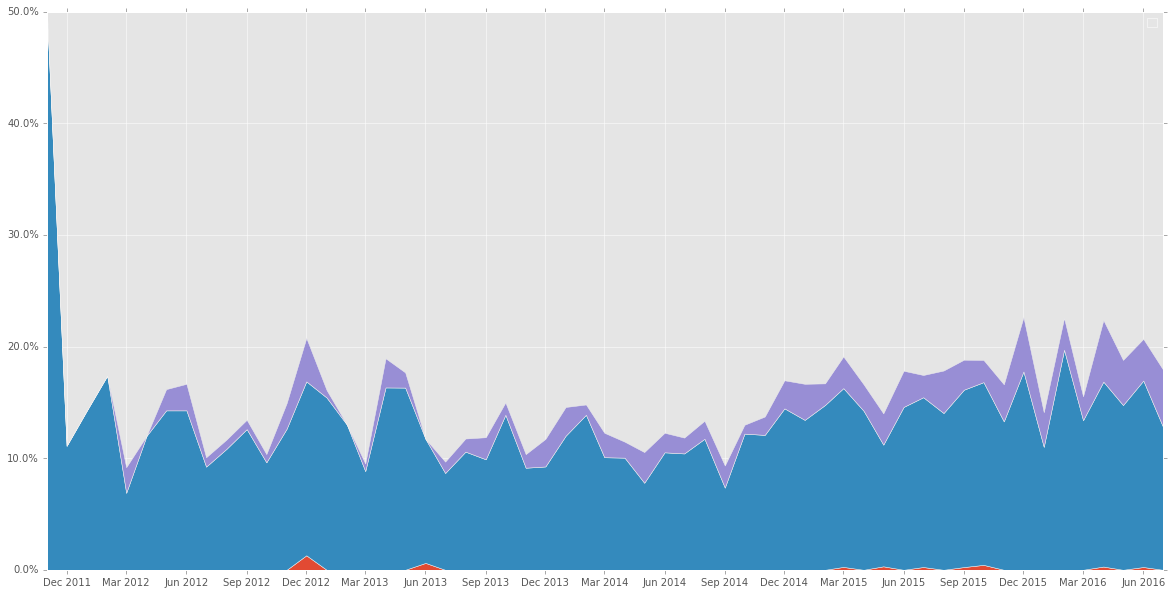

In [4]:
baro = barometre(reviews_en)
baro.addCategory('culture',['culture', 'mindset'])
baro.vectorizeReviews()
baro.addCategory('workplace',['work environment', 'workplace','environment'])
baro.addCategory('pay',['pay', 'remuneration','wage','compensation','salary'])

baro.tagCat('workplace')
baro.tagCat('culture')
baro.tagCat('pay')
baro.plotCat()
baro.info()
#baro.printWord('work')

In [ ]:
baro.reviews[baro.reviews[list(baro.categories.keys())].apply(lambda x: x.max(), axis=1) == 0]['reviewDescription']

In [ ]:
 for w in baro.categories['culture']:
    print(w)
    vocab = baro.vect.vocabulary_.get(w) #la colonne du mot de la catégorie
    slice = baro.vectM[:,vocab].toarray() #l'ensemble des reviews contenant ce mot
    print((slice > 0).sum())
    '''
    if 'culture' in baro.reviews.columns:
        print('in columns')
        baro.reviews['culture'] = np.logical_or(baro.reviews['culture'].values, (slice > 0)) #création d'une colonne du nom de la catégorie
    else:
        print('not in columns')
        baro.reviews['culture'] = (slice > 0) #création d'une colonne du nom de la catégorie
    '''

In [ ]:
sep = int(baro.reviews.shape[0]*0.5)

xtrain = baro.reviews.reviewDescription[:sep]
xtest = baro.reviews.reviewDescription[sep:]

ytrain = baro.reviews[list(baro.categories.keys())[1]][:sep] #reviews filtrées sur les catégories
ytest  = baro.reviews[list(baro.categories.keys())[1]][sep:]

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(lowercase=True,min_df=2, max_df=.8)),
                     ('TFIDF', TfidfTransformer()),
                     ('clf', MultinomialNB(alpha=0))])
text_clf = text_clf.fit(xtrain, ytrain)

predicted = text_clf.predict(xtest)
print(metrics.classification_report(ytest, predicted))

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
Xvect[:,vect.vocabulary_.get('mindset')]

In [ ]:
pd.set_option('display.width', 1000)
pd.options.display.max_seq_items = 2000
pd.set_option('max_colwidth',500)

In [7]:
baro.plotCat()

IndexError: single positional indexer is out-of-bounds

In [66]:
r = reviews_en.reviewDescription.str.split('.').values
#r[0:1000]
s = [item for sublist in r for item in sublist if len(item)>2]
s[0:1000]
s.to_csv('phrases.csv')

AttributeError: 'list' object has no attribute 'to_csv'

In [34]:
import csv
resultFile = open("sentences.csv",'w', encoding="utf-16"))
wr = csv.writer(resultFile, dialect='excel')
wr.writerow(r)

3543166

In [33]:
np.savetxt("sentences.csv", sentences, fmt='%s')

UnicodeEncodeError: 'latin-1' codec can't encode character '\u2026' in position 499: ordinal not in range(256)